# predicting heart disease using machine learning
1. Problem Definition
2. Data
3. Evaluationg
4. Features
5. Modelling
6. Experimintation
## Problem Def
> Given pars we want to predict wither 0 or 1


## Preparing the tools


In [409]:
#Regular EDA and plotting libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#Models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV 
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import RocCurveDisplay

## LOAD DATA

In [3]:
df = pd.read_csv("heart-disease.csv")
df.shape #(rows , columns)

(303, 14)

## DATA EXPLORATION 
Get use of your Data Make a friend with them  


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

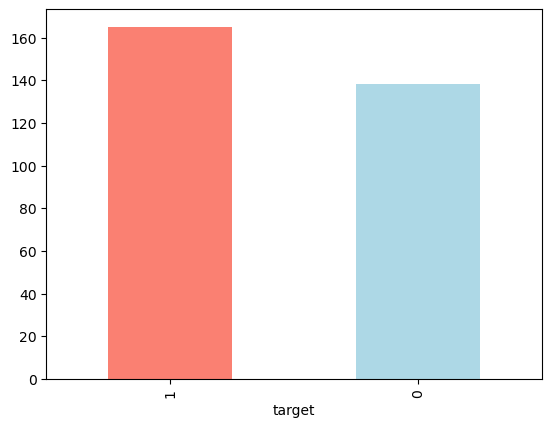

In [6]:
df.target.value_counts().plot(kind = "bar" , color = ["salmon" , "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Hear Dis frequency according to sex 

In [10]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
# Comparing target with sex 
pd.crosstab(df.target , df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## AGE vs Max hear Rate for heart dis


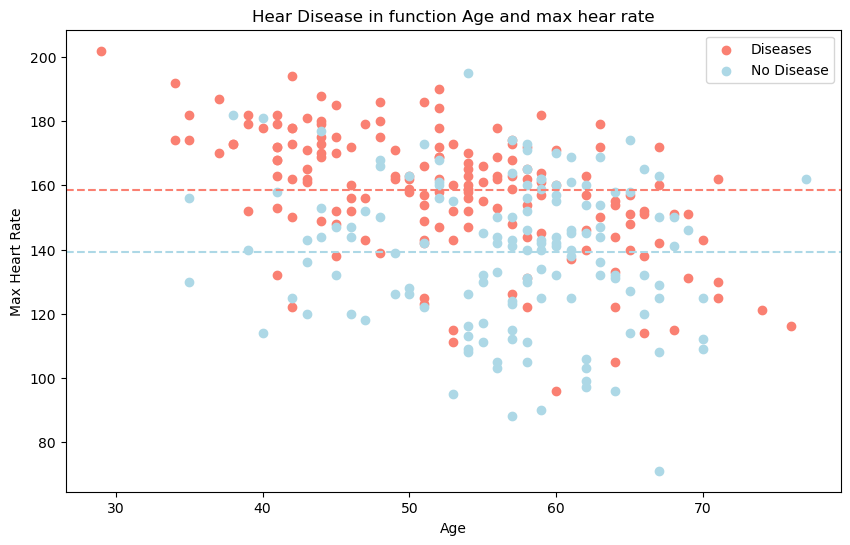

In [13]:
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1], 
             df.thalach[df.target ==1], 
            c = "salmon", 
            ),
plt.scatter(df.age[df.target == 0], 
            df.thalach[df.target == 0], 
            c = "lightblue"
            )
plt.axhline(y= df.thalach[df.target == 0].mean() , color = "lightblue" , ls = "--");
plt.axhline(y= df.thalach[df.target == 1].mean() , color = "salmon" , ls = "--");

#Add some helpful info
plt.title("Hear Disease in function Age and max hear rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Diseases" , "No Disease"])




<Axes: ylabel='Frequency'>

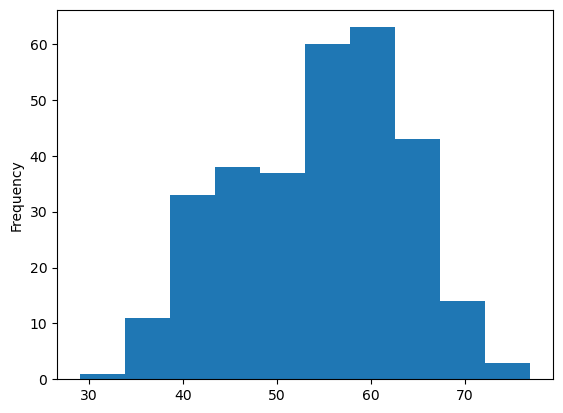

In [14]:
#Checking the distribution (spread) of the age column with a histogram
df.age.plot.hist()

In [16]:
## Hear disease frequency per chest pain type
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


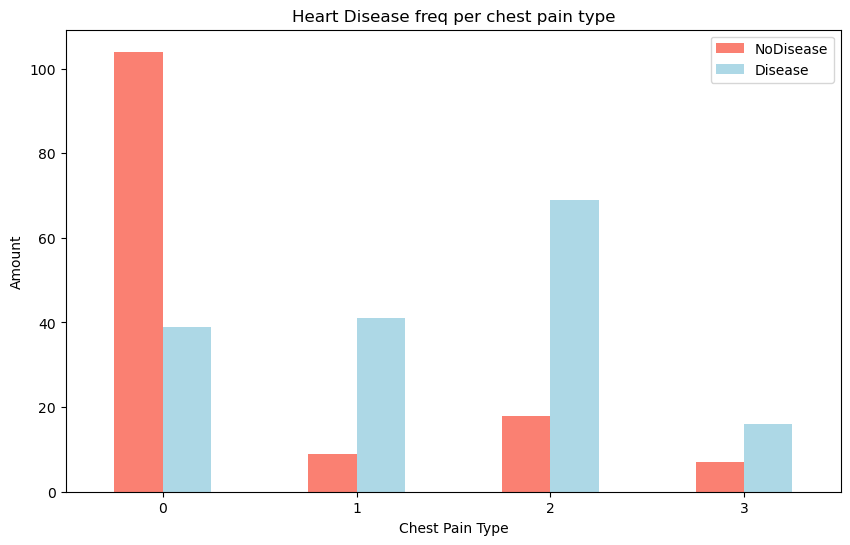

In [24]:
#Make the crosstab more visual
pd.crosstab(df.cp , df.target).plot(kind="bar" , figsize=(10, 6) , color = ["salmon","lightblue"] );

plt.title("Heart Disease freq per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NoDisease" , "Disease"]);
plt.xticks(rotation = 0);

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
#Make a correlation mat
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


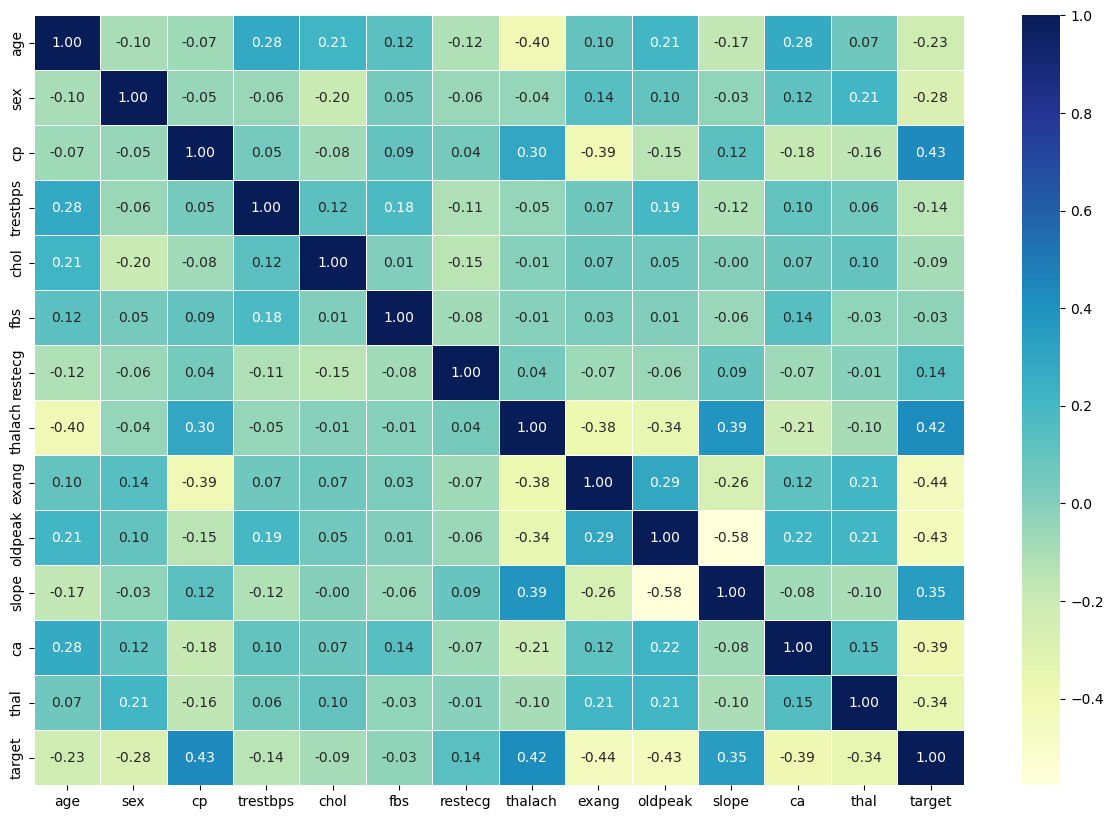

In [27]:
#Let's Make our cor mat a little prettier
corr_mat = df.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(corr_mat , annot=True , linewidths=0.5 , fmt="0.2f" , cmap="YlGnBu")

## Modelling 

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
# Split Data into X and Y 
x = df.drop("target" , axis = 1)

y = df["target"]

In [32]:
#split data into train and test 
np.random.seed(42)

x_train , x_test , y_train , y_test = train_test_split(x 
                                                       , y 
                                                       ,test_size=0.2)


In [33]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [35]:
len(y_train), len(x_train)

(242, 242)

We r going to try 3 diff ml models
1. logistic reg
2. K-nearest
3. randomForest 

In [36]:
#Put models in a dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random forest": RandomForestClassifier()}
#Create a function to fit and score models
def fit_and_score(models , x_train, x_test , y_train , y_test):
    """ 
    """
    np.random.seed(42)
    model_scores = {}
    #Loop through models
    for name , model in models.items():
        model.fit(x_train , y_train)
        #evaluate 
        model_scores[name] = model.score(x_test , y_test)
    return model_scores



In [39]:
model_scores = fit_and_score(models= models , x_train=x_train , x_test=x_test , y_train=y_train, y_test = y_test)
model_scores

C:\Users\aa\Desktop\hdp\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

<Axes: >

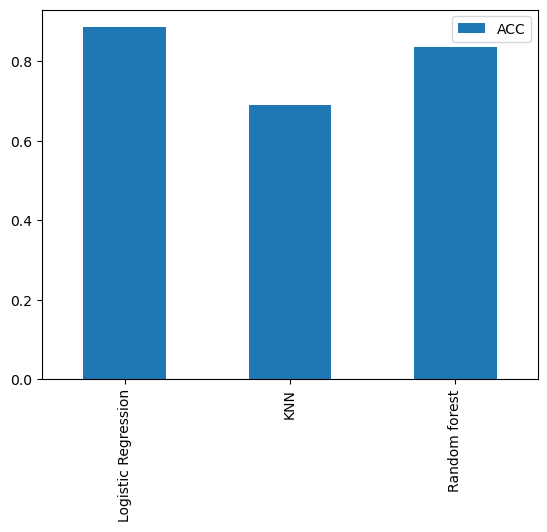

In [42]:
model_compare = pd.DataFrame(model_scores, index=["ACC"])
model_compare.T.plot.bar()

* Hyper par Tuning
* Feature impoertance
* conf mat
* cross val
* prec
* recall
* f1
* classification report
* ROC
* AUC

## Hyper pars Tuning 


In [43]:
#Tuning KNN
train_score = []
test_score = []
#Create a list of diff vals of KNN
neigbors = range(1 , 21)

knn = KNeighborsClassifier()
for i in neigbors:
    knn.set_params(n_neighbors = i)

    knn.fit(x_train , y_train)

    train_score.append(knn.score(x_train , y_train))
    test_score.append(knn.score(x_test , y_test))



In [44]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [45]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

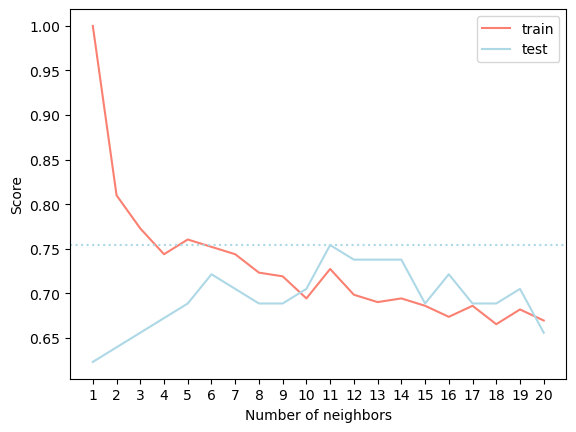

In [57]:
plt.plot(neigbors , train_score , label = "train score" , color = "salmon")
plt.plot(neigbors , test_score , label = "test score" , color = "lightblue")
plt.axhline(y = max(test_score) , ls = ":" , color = "lightblue")
plt.xticks(np.arange(1 , 21 , 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.legend(['train' , 'test'])

## Hyperparameter tuning with RandomizedSearchCV
* Logistix Reg
* RandomForestclf
> using RandomizedSearchCV

In [109]:
#create a hyperpars grid for Logistic reg
log_reg_grid = {"C" : np.logspace(-1 , 10 , 10) , 
                "solver" : ["liblinear", "lbfgs" , "newton-cg"  ]
                }

 #Create hp grid 
rf_grid = {"n_estimators" : np.arange(10 , 1000 , 60) , 
           "max_depth" : [None , 3, 5 ,10], 
           "min_samples_split" : np.arange(2, 20 , 2),
           "min_samples_leaf" :np.arange(1 , 20 , 2)
            }

In [94]:
#Tune Logistic Regression 
# np.random.seed(42)
rs_log_red = RandomizedSearchCV(LogisticRegression() ,
                                 param_distributions= log_reg_grid , 
                                 cv = 10 , n_iter= 100 , verbose=True
                                 )
rs_log_red.fit(x_train , y_train)

C:\Users\aa\Desktop\hdp\env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\aa\Desktop\hdp\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aa\Desktop\hdp\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scal

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\aa\Desktop\hdp\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aa\Desktop\hdp\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-01, 1.66810054e+00, 2.78255940e+01, 4.64158883e+02,
       7.74263683e+03, 1.29154967e+05, 2.15443469e+06, 3.59381366e+07,
       5.99484250e+08, 1.00000000e+10]),
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg']},
                   verbose=True)

In [95]:
rs_log_red.best_params_

{'solver': 'liblinear', 'C': 0.1}

In [96]:
rs_log_red.score(x_test , y_test)

0.8852459016393442

In [116]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier() , 
                           param_distributions= rf_grid, 
                           cv = 10 ,
                           n_iter= 10 , 
                           verbose=True
                          )
rs_rf.fit(x_train , y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  70, 130, 190, 250, 310, 370, 430, 490, 550, 610, 670, 730,
       790, 850, 910, 970])},
                   verbose=True)

In [117]:
rs_rf.best_params_

{'n_estimators': 430,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [119]:
rs_rf.score(x_test , y_test)

0.8688524590163934

# using Grid search over the Logistic Reg Model

In [121]:
#Different Hyperparameters for our logistic Reg
log_reg_grid = {
    "C" : np.logspace(-4 , 4 , 30),
    "solver" : ["liblinear"] , 
}
gs_log_reg = GridSearchCV(LogisticRegression() , 
                          param_grid=log_reg_grid ,
                          cv = 5, 
                          verbose=True)
#FIT
gs_log_reg.fit(x_train , y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [122]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [123]:
gs_log_reg.score(x_test , y_test)

0.8852459016393442

In [124]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

In [156]:
model = LogisticRegression( solver= 'liblinear' , C = 0.20433597178569418 , 
                           )
model.fit(x_train, y_train);
model.score(x_test , y_test)


0.8852459016393442

In [157]:
model.score(x_test , y_test)

0.8852459016393442

In [ ]:
#            "n_estimators" : np.arange(10 , 1000 , 60) , 
#            "max_depth" : [None , 3, 5 ,10], 
#            "min_samples_split" : np.arange(2, 20 , 2),
#            "min_samples_leaf" :np.arange(1 , 20 , 2)

In [402]:
clf = RandomForestClassifier(
    n_estimators= 1000 , 
    max_depth= 4, 
    min_samples_leaf= 50, 
    min_samples_split= 15
)
clf.fit(x_train  , y_train)
clf.score(x_test , y_test)

0.9180327868852459

In [383]:
clf2 = RandomForestClassifier(
    n_estimators= 100 , 
    max_depth= 4, 
    min_samples_leaf= 50, 
    min_samples_split= 50, 
    bootstrap=True, 
    
)
clf2.fit(x_train  , y_train)
clf2.score(x_test , y_test)


0.9180327868852459

In [406]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf , x , y , cv = 3)


array([0.76237624, 0.85148515, 0.77227723])

## Evaluating our tuned Classifier , beyond acc
* ROC and AUC
* confusion mat
* prec
* recall
* F1 

In [426]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [408]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [411]:
from sklearn.metrics import RocCurveDisplay

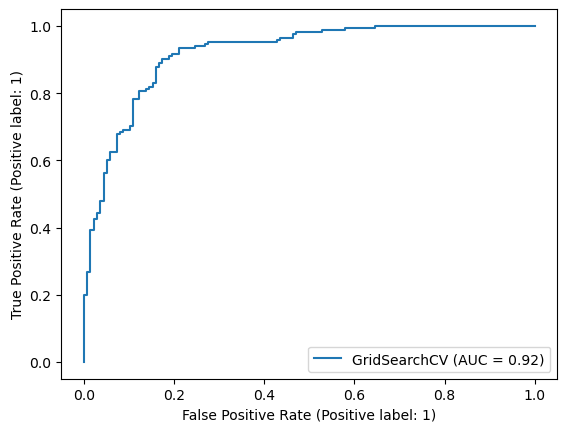

In [417]:
RocCurveDisplay.from_estimator(gs_log_reg , x , y)

In [418]:
#confusion MAt 
print(confusion_matrix(y_test , y_preds))

[[25  4]
 [ 3 29]]


In [421]:
import seaborn as sns
sns

<module 'seaborn' from 'C:\\Users\\aa\\Desktop\\hdp\\env\\lib\\site-packages\\seaborn\\__init__.py'>

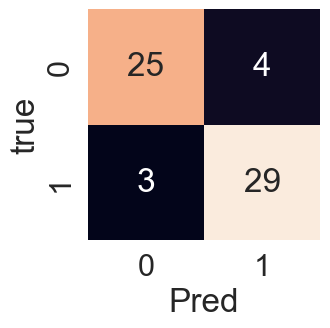

In [428]:
#Improve Confusion mat


sns.set(font_scale = 2)
def plot_conf_mat(y_test , y_preds):
    """
  """
    fig , ax = plt.subplots(figsize= (3 , 3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds), annot=True , 
                     cbar = False)
    plt.xlabel("Pred")
    plt.ylabel("true")
plot_conf_mat(y_test= y_test , y_preds= y_preds)

In [429]:
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

